In [67]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mecab import MeCab
from pymongo import MongoClient
import pandas as pd 

# 네트워크 연결 규칙 : protocol://ip:port/path 
client = MongoClient('mongodb://192.168.0.50:27017/')

db_name = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]


In [68]:
find_data = collection.find()
data_list = list(find_data)

In [69]:
df_data = pd.DataFrame(data_list)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251836 entries, 0 to 251835
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         251836 non-null  object        
 1   COMMENT     251836 non-null  object        
 2   CREATED_AT  251836 non-null  datetime64[ns]
 3   DATE        251836 non-null  object        
 4   DATETIME    251836 non-null  object        
 5   SYMBOL      251836 non-null  object        
 6   UPDATED_AT  251836 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.4+ MB


In [85]:
df_data[:50000].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _id         50000 non-null  object        
 1   COMMENT     50000 non-null  object        
 2   CREATED_AT  50000 non-null  datetime64[ns]
 3   DATE        50000 non-null  object        
 4   DATETIME    50000 non-null  object        
 5   SYMBOL      50000 non-null  object        
 6   UPDATED_AT  50000 non-null  object        
 7   WEEK        50000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.1+ MB


In [86]:
# df_data[:50000].to_csv('output.csv', index=False)  # index=False로 인덱스 열 제외

In [70]:
mecab_inst = MeCab()

In [71]:
# 주차 계산을 위한 함수 정의
def get_week(date_str):
    # 정규 표현식으로 연도와 월, 일을 추출
    match = re.match(r'(\d{4})-(\d{2})-(\d{2})', date_str)
    if match:
        year, month, day = map(int, match.groups())
        # 날짜 객체 생성
        date = pd.Timestamp(year=year, month=month, day=day)
        # ISO 주차 반환
        return date.isocalendar()[1]  # 주차
    return None


In [72]:
# DATE 열에서 주차 계산
df_data['WEEK'] = df_data['DATE'].apply(get_week)

# 주차별로 그룹화하여 집계 (예: VALUE의 합계)
weekly_data = df_data.groupby(['WEEK']).agg({'COMMENT': ' '.join}).reset_index()

# 결과 출력
print(weekly_data)

   WEEK                                            COMMENT
0    47  머선일이야 뭐냐 너..왜 희망 갖게하냐 몇개월 기다리다가 조금 올라서 뺏더니 잘 올...
1    49  계엄 실패 너무 아쉬운 사람 개추 👍👍👍 2024-12-04\n\n안녕하세요 존버꿀...
2    50  치매치료약 문열어주세요 현기증난단말이에요 하.. 14퍼 올랐는데 3만원밖에 안 넣어...
3    51  테슬라 흥행하면 꼭 자빠지네 브론즈 뱃지ㅣ단 듣보들이 차트분석을올린다?\n강력한 매...
4    52  오늘 진짜 궁금하네 ㅋㅋ 제가 올해 총 600 수익을 냈고\n지금 -330인데 팔아...


Counter({'애플': 34, '주주': 15, '주식': 15, '아처': 14, '회사': 13, '매수': 11, '달러': 10, '매도': 10, '진입': 8, '수익': 8, '추매': 7, '조비': 7, '시리': 6, '종목': 6, '주가': 6, '프로': 6, '소송': 6, '조항': 6, '비중': 5, '생각': 5, '내년': 5, '저점': 5, '평단': 5, '공매도': 5, '제기': 5, '출시': 4, '공개': 4, '기능': 4, '정보': 4, '사과': 4, '오늘': 4, '안녕': 4, '평가': 4, '투자자': 4, '투자': 4, '책임': 4, '글로벌': 4, '중국': 4, '정도': 4, '여기': 4, '분할': 4, '법정': 4, '비행': 4, '발표': 4, '상용': 4, '주요': 3, '개발': 3, '진행': 3, '예정': 3, '요약': 3, '단계': 3, '개인': 3, '전략': 3, '실현': 3, '세금': 3, '번스타인': 3, '가능': 3, '자릿수': 3, '매출': 3, '성장': 3, '개선': 3, '추가': 3, '자산': 3, '관련': 3, '무선': 3, '예상': 3, '이거': 3, '자리': 3, '구매': 3, '시작': 3, '퀀텀': 3, '컴퓨팅': 3, '감소': 3, '판매': 3, '대비': 3, '기록': 3, '타이밍': 3, '건지': 3, '손절': 3, '지지': 3, '이상': 3, '가요': 3, '안티': 3, '버거': 3, '도전': 3, '면제': 3, '문제': 3, '이번': 3, '상황': 3, '시험': 3, '절반': 3, '확인': 3, '대기': 3, '추세': 3, '선일': 2, '희망': 2, '얼마': 2, '목표': 2, '내용': 2, '기반': 2, '일부': 2, '대화': 2, '작업': 2, '준비': 2, '보호': 2, '핵심': 2, '횡보': 2, '완료': 2, '단타

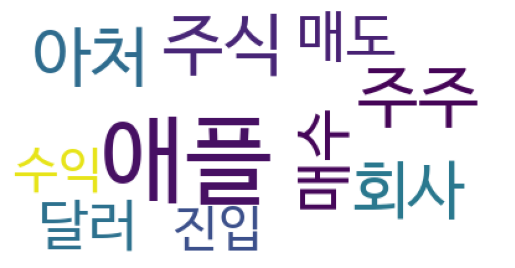

Counter({'엔비디아': 255, '애플': 67, '주식': 65, '달러': 63, '시장': 58, '예상': 48, '오늘': 48, '미국': 47, '상승': 44, '투자': 44, '매수': 40, '반도체': 37, '환율': 35, '수익': 35, '발표': 34, '테슬라': 34, '생각': 31, '계엄': 30, '기술': 30, '가즈': 29, '조정': 27, '기업': 27, '국장': 27, '지수': 26, '평단': 25, '계엄령': 23, '이전': 23, '내년': 22, '제조업': 22, '하나': 22, '가능': 21, '시간': 21, '주가': 21, '하락': 21, '미장': 20, '모습': 20, '때문': 20, '구매': 20, '실적': 20, '가격': 20, '대한민국': 19, '종목': 19, '수요': 18, '메타': 18, '글로벌': 18, '고점': 18, '코인': 18, '한국': 17, '예정': 17, '횡보': 17, '정도': 17, '이거': 17, '이상': 17, '마소': 17, '사람': 16, '마감': 16, '블랙웰': 16, '다음': 16, '주문': 16, '중국': 16, '시작': 15, '지금': 15, '분기': 15, '영향': 15, '매도': 15, '이유': 15, '환전': 15, '금리': 14, '주요': 14, '성장': 14, '프로': 14, '우리': 14, '장기': 14, '하루': 14, '전망': 14, '차트': 14, '중심': 13, '대만': 13, '공급': 13, '생산': 13, '이게': 13, '관련': 13, '양전': 13, '오전': 13, '토스': 13, '기회': 13, '비트코인': 12, '최고': 12, '기대': 12, '나스닥': 12, '지표': 12, '어디': 12, '악재': 12, '이슈': 11, '아마존': 11, '마이크': 11, '언제': 11, '사용':

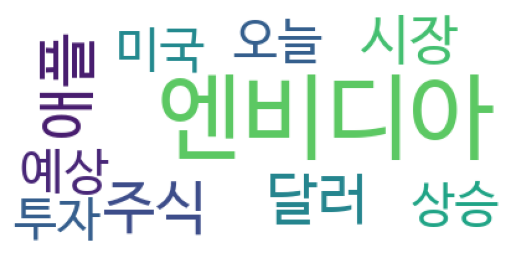

Counter({'테슬라': 157, '엔비디아': 142, '조정': 88, '주식': 70, '추매': 69, '달러': 60, '매수': 56, '수익': 52, '중국': 49, '생각': 48, '오늘': 45, '고점': 40, '상승': 35, '미국': 33, '하락': 31, '사람': 31, '프로': 30, '이번': 30, '정도': 30, '시작': 29, '매도': 29, '진입': 29, '반독점': 27, '가즈': 25, '기업': 25, '투자': 25, '주가': 24, '횡보': 24, '하나': 23, '예상': 22, '어디': 22, '시장': 21, '이거': 21, '모델': 21, '저점': 19, '아마존': 19, '기회': 19, '다음': 18, '실적': 18, '때문': 18, '조사': 18, '시간': 17, '가능': 17, '종목': 16, '호재': 16, '실현': 15, '분할': 15, '산타랠리': 15, '돌파': 15, '타이밍': 14, '트럼프': 14, '이유': 14, '환율': 14, '내년': 14, '이상': 13, '지금': 13, '가격': 13, '평단': 13, '국장': 12, '토스': 12, '이전': 12, '여기': 12, '차트': 12, '중요': 12, '손절': 12, '스퀴즈': 12, '출시': 12, '가치': 11, '전고': 11, '기대': 11, '의심': 11, '악재': 11, '뉴스': 11, '단타': 11, '개미': 11, '얼마': 11, '홀딩': 11, '우리': 11, '라인': 10, '미래': 10, '발표': 10, '변동': 10, '기관': 10, '티어': 10, '동안': 10, '옵션': 10, '음전': 10, '긍정': 9, '건가요': 9, '연말': 9, '양전': 9, '충이': 9, '애플': 9, '원화': 9, '기술': 9, '구매': 9, '거래량': 9, '매매': 9, '마지막': 9

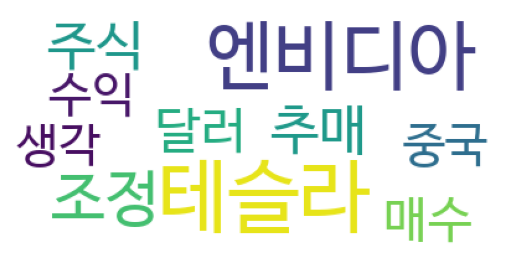

Counter({'테슬라': 296, '조정': 78, '달러': 72, '트럼프': 67, '주식': 63, '수익': 50, '사람': 49, '머스크': 49, '고점': 48, '시작': 47, '추매': 47, '생각': 47, '매수': 43, '프로': 42, '주가': 41, '투자': 40, '오늘': 38, '이거': 37, '어디': 37, '엔비디아': 35, '연설': 32, '예상': 30, '마녀': 30, '상승': 29, '목표': 28, '자율': 28, '미국': 28, '가즈': 28, '주행': 27, '정도': 25, '이게': 25, '종목': 24, '이전': 23, '이번': 23, '가능': 23, '연말': 23, '진입': 23, '하나': 23, '광기': 22, '감사': 21, '시간': 20, '가격': 20, '매도': 20, '지금': 20, '복사': 19, '이상': 18, '상향': 18, '우리': 18, '저점': 17, '내년': 16, '분할': 16, '이건': 16, '모델': 16, '코인': 16, '하루': 15, '돌파': 15, '언급': 15, '평가': 15, '시드': 15, '다음': 15, '구매': 14, '여기': 14, '전기차': 14, '예정': 13, '기관': 13, '발표': 13, '토스': 13, '동안': 13, '기회': 13, '최고': 13, '주주': 13, '이유': 12, '평단': 12, '국장': 12, '미장': 12, '올해': 12, '마감': 12, '재산': 12, '시장': 11, '출시': 11, '빌게이츠': 11, '호재': 11, '행정부': 11, '취임식': 11, '얘기': 11, '경제': 10, '기분': 10, '준비': 10, '취임': 10, '로보': 10, '택시': 10, '이젠': 10, '산타랠리': 10, '이걸': 10, '가치': 10, '옵션': 10, '종가': 10, '점검': 10

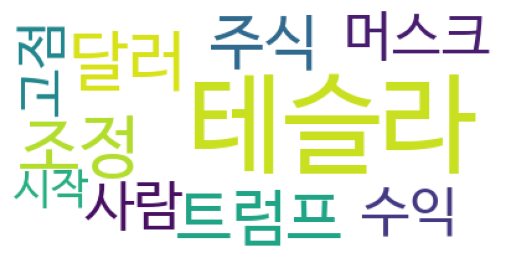

Counter({'테슬라': 81, '엔비디아': 54, '생각': 41, '주식': 36, '사람': 34, '오늘': 30, '수익': 27, '투자': 26, '머스크': 26, '우리': 24, '이전': 24, '예상': 22, '주가': 22, '상승': 22, '기업': 21, '이번': 21, '하락': 21, '매수': 21, '이상': 20, '추매': 20, '달러': 19, '본인': 18, '개미': 18, '시작': 18, '시간': 18, '가능': 18, '미국': 18, '애플': 18, '내년': 17, '산타랠리': 17, '산타': 17, '예정': 15, '시장': 15, '데이터': 15, '개발': 15, '정도': 15, '트럼프': 15, '글로벌': 14, '전망': 14, '조정': 14, '경제': 14, '화요일': 14, '오전': 14, '가즈': 14, '백인': 14, '올해': 13, '프로': 13, '캘린더': 12, '국채': 12, '입찰': 12, '비용': 12, '어디': 12, '옵션': 12, '금액': 11, '후회': 11, '보유': 11, '기회': 11, '이장': 11, '구매': 11, '사랑': 10, '메타': 10, '종목': 10, '연준': 10, '기대': 10, '대비': 10, '베이': 10, '조스': 10, '소득세': 10, '이유': 10, '최소': 9, '누구': 9, '반영': 9, '정보': 9, '멘탈': 9, '코인': 9, '저점': 9, '월요일': 9, '국내': 9, '확대': 9, '지수': 9, '개월': 9, '모건': 9, '스탠리': 9, '차세대': 9, '토스': 9, '마녀': 9, '진입': 9, '폭스콘': 9, '기술': 9, '매도': 9, '장기': 8, '의견': 8, '미래': 8, '소리': 8, '마켓': 8, '메모리': 8, '기존': 8, '변화': 8, '규모': 8, '오후': 8, '개인':

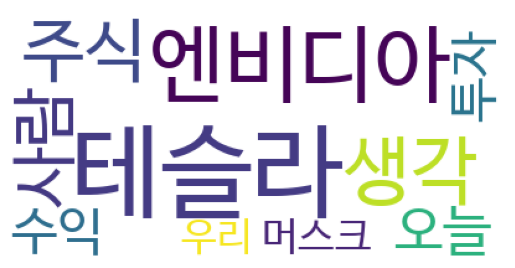

In [ ]:
for text in weekly_data['COMMENT'].values:
    nouns_text = mecab_inst.nouns(text[:60000])
    filtered_nouns = [noun for noun in nouns_text if len(noun) > 1]
    
    counter_text_splits = Counter(filtered_nouns)
    # '엔비'와 '비디아'의 count를 합쳐서 '엔비디아'에 저장
    if '엔비' in counter_text_splits and '비디아' in counter_text_splits:
        combined_count = counter_text_splits['엔비'] + counter_text_splits['비디아']
        counter_text_splits['엔비디아'] = combined_count

        # '엔비'와 '비디아'는 이제 삭제 (선택 사항)
        del counter_text_splits['엔비']
        del counter_text_splits['비디아']

    counter_dict = dict(counter_text_splits.most_common()[:10])

    wordcloud_instance = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
    wordcloud_instance.generate_from_frequencies(counter_dict) 

    plt.imshow(wordcloud_instance)
    plt.axis('off')
    plt.show()


In [87]:
def run_wordcloud(date_col_name, comment_col_name):
    df_data['WEEK'] = df_data[date_col_name].apply(get_week)
    weekly_data = df_data.groupby(['WEEK']).agg({comment_col_name: ' '.join}).reset_index()
    print(weekly_data)

    for text in weekly_data[comment_col_name].values:
        nouns_text = mecab_inst.nouns(text[:60000])
        filtered_nouns = [noun for noun in nouns_text if len(noun) > 1]

        counter_text_splits = Counter(filtered_nouns)
        # '엔비'와 '비디아'의 count를 합쳐서 '엔비디아'에 저장
        if '엔비' in counter_text_splits and '비디아' in counter_text_splits:
            combined_count = counter_text_splits['엔비'] + counter_text_splits['비디아']
            counter_text_splits['엔비디아'] = combined_count

            # '엔비'와 '비디아'는 이제 삭제 (선택 사항)
            del counter_text_splits['엔비']
            del counter_text_splits['비디아']
        counter_dict = dict(counter_text_splits.most_common()[:10])

        wordcloud_instance = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
        wordcloud_instance.generate_from_frequencies(counter_dict) 

        plt.imshow(wordcloud_instance)
        plt.axis('off')
        plt.show()


   WEEK                                            COMMENT
0    47  머선일이야 뭐냐 너..왜 희망 갖게하냐 몇개월 기다리다가 조금 올라서 뺏더니 잘 올...
1    49  계엄 실패 너무 아쉬운 사람 개추 👍👍👍 2024-12-04\n\n안녕하세요 존버꿀...
2    50  치매치료약 문열어주세요 현기증난단말이에요 하.. 14퍼 올랐는데 3만원밖에 안 넣어...
3    51  테슬라 흥행하면 꼭 자빠지네 브론즈 뱃지ㅣ단 듣보들이 차트분석을올린다?\n강력한 매...
4    52  오늘 진짜 궁금하네 ㅋㅋ 제가 올해 총 600 수익을 냈고\n지금 -330인데 팔아...


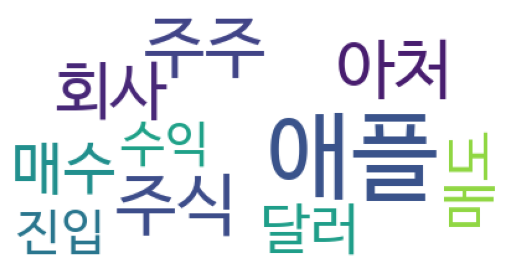

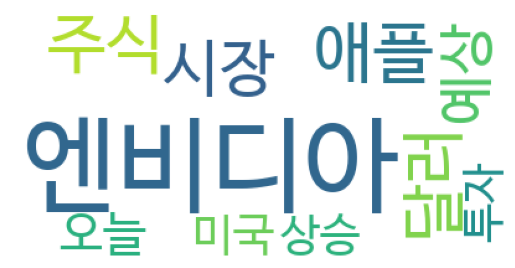

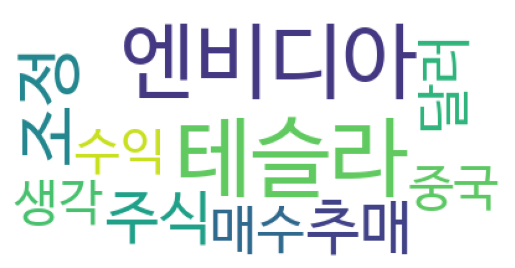

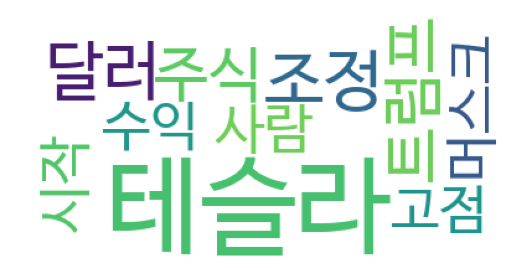

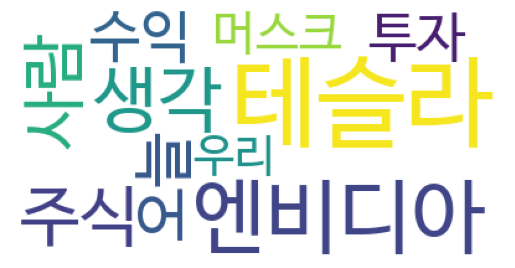

In [88]:
run_wordcloud('DATE','COMMENT')